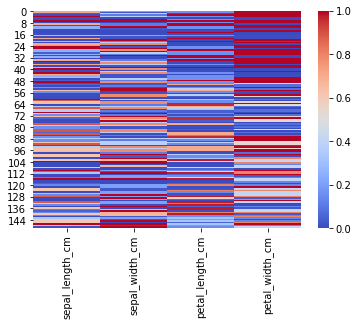

In [22]:

import sys
import os
qprc_path = os.path.abspath(os.path.join('..'))
if qprc_path not in sys.path:
    sys.path.append(qprc_path)
sys.path

from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import seaborn as sns
from  kernelfuzzy.fuzzysets import FuzzySet
from  kernelfuzzy.fuzzification import FuzzyData


 
#from https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset/46379878#46379878
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

#data to pandas dataframe
iris_data = sklearn_to_df(load_iris())
iris_data.head()

#data fuzzification 
iris_fuzzy_data=FuzzyData(data=iris_data, target='target')
iris_fuzzy_data.quantile_fuzzification_classification()

#printing epistemic values given my the membsership degrees of the values of the dataset
ax = sns.heatmap(iris_fuzzy_data.get_epistemic_values(),cmap="coolwarm")

In [2]:
#kernel gram matrix
from sklearn.metrics.pairwise import rbf_kernel, linear_kernel
from  kernelfuzzy.kernels import cross_product_kernel, gram_matrix_cross_product_kernel
import matplotlib.pyplot as plt

kernel_bandwidth=[0.05, 0.5, 5, 50]

fig, axn = plt.subplots(2, 2,figsize=(10,10))
for i, ax in enumerate(axn.flat):
    K=gram_matrix_cross_product_kernel(iris_fuzzy_data.get_fuzzydata(),
                                   iris_fuzzy_data.get_fuzzydata(),
                                   rbf_kernel,kernel_bandwidth[i],
                                   linear_kernel,'')
    sns.heatmap(K, ax=ax)
fig.tight_layout()

# Support fuzzy-set Machines

TRAIN: [ 61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80 123 133
 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95  20  15
  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110 124  41
 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28  55  75
  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49 136  99
  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36  21   9
 103  67 117  47] TEST: [114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83]


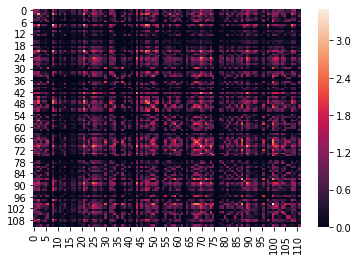

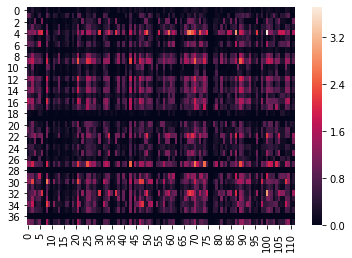

Test accuracy: 0.7894736842105263


In [21]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=iris_fuzzy_data.get_fuzzydata()
y=iris_fuzzy_data.get_target()

from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=.25, random_state=0)
rs.get_n_splits(X)

for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train=X[train_index]
    y_train=y[train_index]
    X_test=X[test_index]
    y_test=y[test_index]
    
    svc_p=SVC(kernel='precomputed')
    #training
    K_train = gram_matrix_cross_product_kernel(X_train,
                                               X_train,
                                               rbf_kernel,0.5,
                                               linear_kernel,'')
    sns.heatmap(K_train)
    plt.show()
    svc_p.fit(K_train,y_train)
    #testing
    K_test = gram_matrix_cross_product_kernel(X_test,
                                              X_train,
                                              rbf_kernel,0.5,
                                              linear_kernel,'')
    
    sns.heatmap(K_test)
    plt.show()

    y_pred=svc_p.predict(K_test)
    acc_test = accuracy_score(y_test, y_pred)
    print("Test accuracy: {}".format(acc_test))


TRAIN: [ 61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80 123 133
 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95  20  15
  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110 124  41
 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28  55  75
  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49 136  99
  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36  21   9
 103  67 117  47] TEST: [114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83]


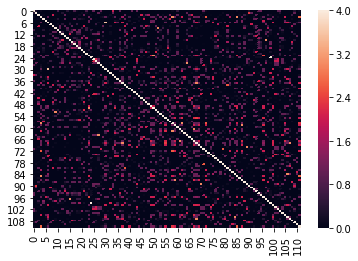

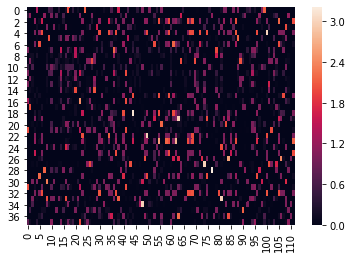

Test accuracy: 1.0


In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=iris_fuzzy_data.get_fuzzydata()
y=iris_fuzzy_data.get_target()

from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1, test_size=.25, random_state=0)
rs.get_n_splits(X)

for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train=X[train_index]
    y_train=y[train_index]
    X_test=X[test_index]
    y_test=y[test_index]
    
    svc_p=SVC(kernel='precomputed')
    #training
    K_train = gram_matrix_cross_product_kernel(X_train,
                                               X_train,
                                               rbf_kernel,50,
                                               rbf_kernel,50)
    sns.heatmap(K_train)
    plt.show()
    svc_p.fit(K_train,y_train)
    #testing
    K_test = gram_matrix_cross_product_kernel(X_test,
                                              X_train,
                                              rbf_kernel,50,
                                              rbf_kernel,50)
    
    sns.heatmap(K_test)
    plt.show()

    y_pred=svc_p.predict(K_test)
    acc_test = accuracy_score(y_test, y_pred)
    print("Test accuracy: {}".format(acc_test))

TRAIN: [ 61  92 112   2 141  43  10  60 116 144 119 108  69 135  56  80 123 133
 106 146  50 147  85  30 101  94  64  89  91 125  48  13 111  95  20  15
  52   3 149  98   6  68 109  96  12 102 120 104 128  46  11 110 124  41
 148   1 113 139  42   4 129  17  38   5  53 143 105   0  34  28  55  75
  35  23  74  31 118  57 131  65  32 138  14 122  19  29 130  49 136  99
  82  79 115 145  72  77  25  81 140 142  39  58  88  70  87  36  21   9
 103  67 117  47] TEST: [114  62  33 107   7 100  40  86  76  71 134  51  73  54  63  37  78  90
  45  16 121  66  24   8 126  22  44  97  93  26 137  84  27 127 132  59
  18  83]


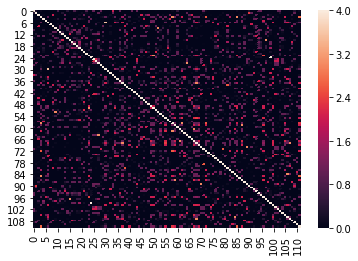

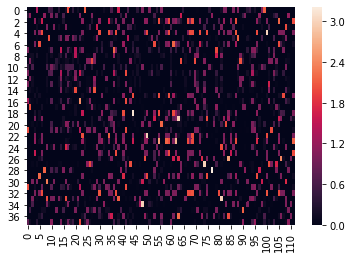

Test accuracy: 1.0
TRAIN: [ 49  62  74  17 106   8 135  80 107  90   0  36 112   5  57 102  55  34
 128  33  21  73   7  45 129 103 146 120  94  50 134  99 126 114   9  39
  97 101  29  81  20  46  51  53  23  27   2  28  37 111  10  84 137 127
  43  87  69 144 140  35  76   3  82 145 116  88  44 147   1  93  38  11
 115  54  40  18  41  79  24  56  71  13  31  85  70 132 125 123 100  32
 104  83 117 118 138  25 110  16  75 109 121  86 139   4  96  14  61  67
 149  95  19  72] TEST: [ 92 141 130 119  48 143 122  63  26  64  42 108  91  77  22 148   6  65
  47  68  60  15 124  58 142  12  59 105  89  78  52 131 113  98  30 136
  66 133]


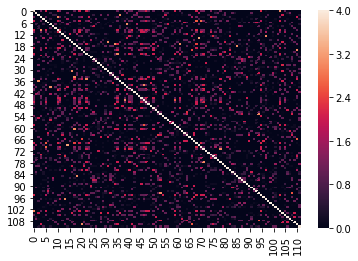

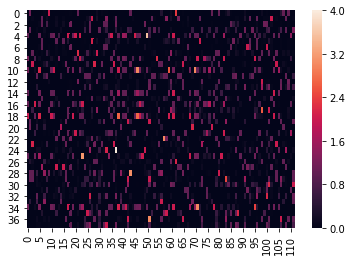

Test accuracy: 0.9736842105263158
TRAIN: [ 89  37  33  84  54  88  73 111 125 101 143  23 117  50 146   2 110 118
 131  17   6 127  67 124  15  56 115 112  71 145 100  38  80 109  44 144
 130  35  97  59  48 134  70  65  98 138  55  43 132 103  30 114  34  18
 141 139  49  52  74  26  45 126  39   4  11  53 149  79   8   0   5 133
  61 135   7  83  99  22  68  82  20  28  86  14  42  32  25  36  92  75
  64 142 120  81  58  13 140  72  87 123  93  91 136  51 116  24  94 106
  16  63 128 105] TEST: [ 85 137  77 108 122 104 121  12  31  96 113 102  60  66 119  62  76  69
  46 129   1  10   3  95  21  41  57  47  78  19 107  90   9 147 148  40
  29  27]


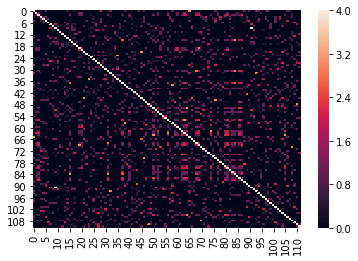

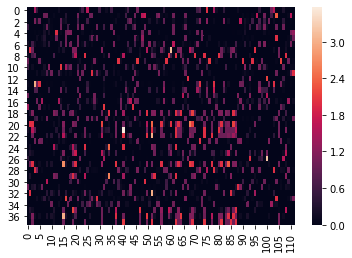

Test accuracy: 0.9736842105263158
TRAIN: [ 29  31  77  27  37  14  48   2  56   1 135  81  18 104 100  41  15 148
  53  79   6  98 132  13  11  10 136  47  60  61 103 145  22 130  55  82
 112 149  62 141 120  86  20  66  35  17  88   4  45  50  57  59  44  70
  32  78 133 110  96  87  74  89  38  51 116  46  43   8  92 101  21 127
 118  73  30 107 124   5   0  95  83  71 144 102 126 108  91  85  67   7
  84  72  94 125 109  26  68  28 121   3 134  69  99  36  24  39 128 113
 129  58 140 131] TEST: [114  49 138  23   9 122 146  80  90 117 111  75 147 143  97  76 123 139
 137  54  34 115  64  65  25 142 119  40  63  42  19 105  93  16 106  12
  33  52]


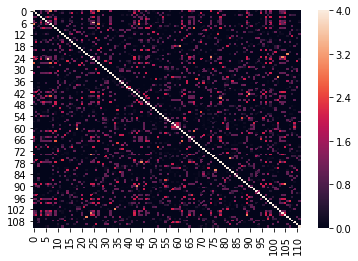

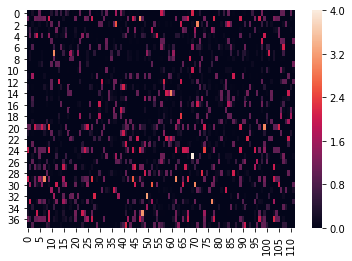

Test accuracy: 0.9473684210526315
TRAIN: [ 85  95  44  68 134  59 118  54 103   8  79  30  91 138 112  50  96 146
  70  61  99  39  84 104 117 101  10   2   9  66  83 121  26  28  42  20
  65 137 109 102  80  71 114  51 128  86  37  92  48 142 107 140 110  73
  76  64  52 149 144  87  34  32 105  12  29 147 111  46  53   7 145  97
  18  33 120  55  49 126  36  40 123   3  24  94  63 141  17   4  58  69
  82 125  89  57  47  45  72  62  78  74  90 133 129 127 119  21  25 136
  35  81  77 100] TEST: [ 15 143  23 108 124  31 132  22 113  41  14   5  88  16 135 122   1 115
  67  13 130 116  11 106 148  56  43  75  60 131 139  98  27   6  38  93
   0  19]


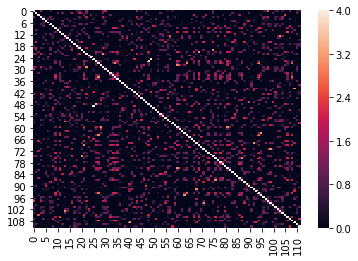

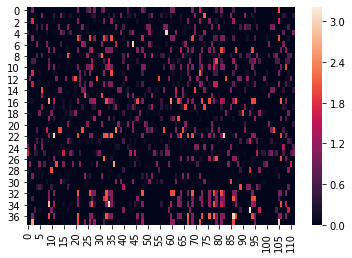

Test accuracy: 0.9736842105263158
0.9736842105263157 0.016643566632465173
Test accuracy all folds: {} None


In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=iris_fuzzy_data.get_fuzzydata()
y=iris_fuzzy_data.get_target()

from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
rs.get_n_splits(X)

acc=[]
for train_index, test_index in rs.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train=X[train_index]
    y_train=y[train_index]
    X_test=X[test_index]
    y_test=y[test_index]
    
    svc_p=SVC(kernel='precomputed')
    #training
    K_train = gram_matrix_cross_product_kernel(X_train,
                                               X_train,
                                               rbf_kernel,50,
                                               rbf_kernel,50)
    sns.heatmap(K_train)
    plt.show()
    svc_p.fit(K_train,y_train)
    #testing
    K_test = gram_matrix_cross_product_kernel(X_test,
                                              X_train,
                                              rbf_kernel,50,
                                              rbf_kernel,50)
    
    sns.heatmap(K_test)
    plt.show()

    y_pred=svc_p.predict(K_test)
    acc_test = accuracy_score(y_test, y_pred)
    acc.append(acc_test)
    print("Test accuracy: {}".format(acc_test))
    
print("Test accuracy all folds: {}", np.mean(acc), np.std(acc))